# Sujet 7 : Autour du SARS-CoV-2 (Covid-19)

## Objectifs

Le but est ici de reproduire des graphes semblables à ceux du [South China Morning Post (SCMP)](https://www.scmp.com/), sur la page The Coronavirus Pandemic et qui montrent pour différents pays le nombre cumulé (c'est-à-dire le nombre total de cas depuis le début de l'épidémie) de personnes atteintes de la maladie à coronavirus 2019.

1. Télécharger les données depuis le site et vérifier leur intégrité;

2. Afficher un graphe montrant l’évolution du nombre de cas cumulé au cours du temps pour les pays suivants : la Belgique (Belgium), la Chine - toutes les provinces sauf Hong-Kong (China), Hong Kong (China, Hong-Kong), la France métropolitaine (France), l’Allemagne (Germany), l’Iran (Iran), l’Italie (Italy), le Japon (Japan), la Corée du Sud (Korea, South), la Hollande sans les colonies (Netherlands), le Portugal (Portugal), l’Espagne (Spain), le Royaume-Unis sans les colonies (United Kingdom), les États-Unis (US);

3. Afficher un graphe avec la date en abscisse et le nombre cumulé de cas à cette date en ordonnée. Deux versions de ce graphe seront proposées, une avec une échelle linéaire et une avec une échelle logarithmique.

## Première partie : récupération et nettoyage des données 

On déclare les librairies qui seront utilisées ici, puis on importe les données : 


In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import math

In [2]:
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
raw_data = pd.read_csv(data_url, skiprows=0)
raw_data

Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.000000  65.000000        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
261            NaN         Western Sahara  24.215500 -12.885800        0   
262            NaN  Sao Tome and Principe   0.186360   6.613081        0   
263            NaN                  Yemen  15.552727  48.516388        0   
264            NaN                Comoros -11.645500  43.333300        0   
265            NaN             Tajikistan  38.861034  71.276093        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/23/20  4/24/20  \
0          0        0        0        0        0  ...     1279     1351   
1          0        0        0        0        0  ...      663      678   
2          0        0        0        0        0  ...     3007     3127   
3          0        0        0        0        0  ...      723      731   
4          0        0        0        0        0  ...       25       25   
..       ...      ...      ...      ...      ...  ...      ...      ...   
261        0        0        0        0        0  ...        6        6   
262        0        0        0        0        0  ...        4        4   
263        0        0        0        0        0  ...        1        1   
264        0        0        0        0        0  ...        0        0   
265        0        0        0        0        0  ...        0        0   

     4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  5/2/20  
0       1463     1531     1703     1828     1939     2171    2335    2469  
1        712      726      736      750      766      773     782     789  
2       3256     3382     3517     3649     3848     4006    4154    4295  
3        738      738      743      743      743      745     745     747  
4         25       26       27       27       27       27      30      35  
..       ...      ...      ...      ...      ...      ...     ...     ...  
261        6        6        6        6        6        6       6       6  
262        4        4        4        8        8       14      16      16  
263        1        1        1        1        6        6       7      10  
264        0        0        0        0        0        1       1       3  
265        0        0        0        0        0       15      15      76  

[266 rows x 106 columns]

On regarde maintenant si il y a des données manquantes dans l'une des colonnes, qui ne soit pas la province (certains pays n'en ont pas). Pour ça, on va créer une copie du tableau en supprimant la colonne province puis regarder si il y a des null :

In [3]:
check_null_data = raw_data.drop(columns=['Province/State'])
check_null_data[check_null_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Country/Region, Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, 1/28/20, 1/29/20, 1/30/20, 1/31/20, 2/1/20, 2/2/20, 2/3/20, 2/4/20, 2/5/20, 2/6/20, 2/7/20, 2/8/20, 2/9/20, 2/10/20, 2/11/20, 2/12/20, 2/13/20, 2/14/20, 2/15/20, 2/16/20, 2/17/20, 2/18/20, 2/19/20, 2/20/20, 2/21/20, 2/22/20, 2/23/20, 2/24/20, 2/25/20, 2/26/20, 2/27/20, 2/28/20, 2/29/20, 3/1/20, 3/2/20, 3/3/20, 3/4/20, 3/5/20, 3/6/20, 3/7/20, 3/8/20, 3/9/20, 3/10/20, 3/11/20, 3/12/20, 3/13/20, 3/14/20, 3/15/20, 3/16/20, 3/17/20, 3/18/20, 3/19/20, 3/20/20, 3/21/20, 3/22/20, 3/23/20, 3/24/20, 3/25/20, 3/26/20, 3/27/20, 3/28/20, 3/29/20, 3/30/20, 3/31/20, 4/1/20, 4/2/20, 4/3/20, 4/4/20, 4/5/20, 4/6/20, 4/7/20, 4/8/20, 4/9/20, 4/10/20, 4/11/20, 4/12/20, 4/13/20, 4/14/20, 4/15/20, 4/16/20, 4/17/20, 4/18/20, 4/19/20, 4/20/20, 4/21/20, 4/22/20, 4/23/20, 4/24/20, 4/25/20, 4/26/20, 4/27/20, ...]
Index: []

[0 rows x 105 columns]

Il n'y a pas de données manquantes. 

## Seconde partie : formattage du dataset pour l'affichage du graphe par pays

Pour formater le dataset, nous allons créer une fonction faisant office de filtre : si le pays est défini dans le tableau (qui représente tous les pays demandés dans l'énoncé) alors on le garde dans le dataset; sinon on le retire. Certains pays devant être affichés sans leurs colonies, le filtre le prendra en compte et retirera les lignes ou le champ *Province/State* est défini.

La Chine est un cas particulier : on va récupérer toutes les rows de Chine dans un second dataset et les fusionner (sauf Hong Kong) pour obtenir le nombre de cas en Chine, puis on ira la fusionner avec le premier dataset plus tard.

Voici le résultat :

In [4]:
def filter_countries(row):
    countries = ['Belgium', 'France', 'China', 'Germany', 'Iran', 'Italy', 'Japan', 'Korea', 'Netherlands', 'Portugal', 'Spain', 'United Kingdom', 'US']
    if row['Country/Region'] in countries:
        if str(row['Country/Region']) in ['France','Netherlands','United Kingdom']:
            if str(row['Province/State']) == "nan":
                return True
            else:
                return False
        if str(row['Country/Region']) == "China":
            if str(row['Province/State']) == "Hong Kong":
                return True
            else:
                return False
        return True

    return False

only_china = raw_data.loc[raw_data['Country/Region'] == 'China']
only_china = only_china.loc[only_china['Province/State'] != 'Hong Kong']
only_china = only_china.groupby(['Country/Region']).sum()
only_china

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                             
China           1061.0367  3570.2197      548      641      918     1401   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  4/23/20  4/24/20  \
Country/Region                                      ...                     
China              2067     2869     5501     6077  ...    82849    82864   

                4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  \
Country/Region                                                                 
China             82872    82875    82881    82903    82907    82919   82920   

                5/2/20  
Country/Region          
China            82920  

[1 rows x 104 columns]

Le calcul suivant va appliquer le filtre sur le dataset, renommer la ligne pour la Chine (qui représente seulement Hong Kong) en Hong Kong (on le considèrera comme une région), fusionner la ligne pour la Chine du second dataset (qui est la somme de toutes les régions) avec le premier dataset puis enfin nettoyer le dataset des colonnes devenues obsolètes et transposer le dataset pour que les rows soient maintenant des dates.

Seulement, ces dates sont en format texte : on utilise une fonction lambda pour les convertir en format datetime, puis on les réindexent pour qu'elles soient triées par temps. 

In [5]:
if len(raw_data.index) > 0:
    new_data = raw_data[raw_data.apply(filter_countries, axis=1)]

new_data = new_data.set_index('Country/Region')
new_data = new_data.rename(index={"China": "Hong Kong"})
new_data = new_data.append(only_china, sort='False')
new_data = new_data.drop(columns=['Lat', 'Long','Province/State'])
new_data = new_data.T
new_data.index = [pd.to_datetime(datetext) for datetext in new_data.index]
new_data = new_data.sort_index()
new_data

Country/Region  Belgium  Hong Kong  France  Germany   Iran   Italy  Japan  \
2020-01-22            0          0       0        0      0       0      2   
2020-01-23            0          2       0        0      0       0      2   
2020-01-24            0          2       2        0      0       0      2   
2020-01-25            0          5       3        0      0       0      2   
2020-01-26            0          8       3        0      0       0      4   
...                 ...        ...     ...      ...    ...     ...    ...   
2020-04-28        47334       1037  167605   159912  92584  201505  13736   
2020-04-29        47859       1037  165093   161539  93657  203591  13895   
2020-04-30        48519       1037  165764   163009  94640  205463  14088   
2020-05-01        49032       1039  165764   164077  95646  207428  14305   
2020-05-02        49517       1039  166976   164967  96448  209328  14571   

Country/Region  Netherlands  Portugal   Spain  United Kingdom       US  China  
2020-01-22                0         0       0               0        1    548  
2020-01-23                0         0       0               0        1    641  
2020-01-24                0         0       0               0        2    918  
2020-01-25                0         0       0               0        2   1401  
2020-01-26                0         0       0               0        5   2067  
...                     ...       ...     ...             ...      ...    ...  
2020-04-28            38416     24322  210773          161145  1012582  82903  
2020-04-29            38802     24505  212917          165221  1039909  82907  
2020-04-30            39316     25045  213435          171253  1069424  82919  
2020-05-01            39791     25351  213435          177454  1103461  82920  
2020-05-02            40236     25190  216582          182260  1132539  82920  

[102 rows x 13 columns]

## Troisième partie : affichage du graphe par pays

Nos données sont prêtes : on les affiche en utilisant la fonction plot() fournie par matplotlib :

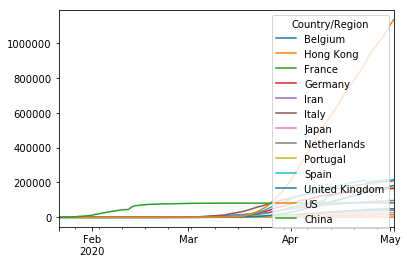

In [6]:
new_data.plot()

## Quatrième partie : formattage des données pour les graphes cumulés sur le temps

Pour ces graphes, on a juste à sommer toutes les lignes et se débarasser des données inutiles, puis formatter les champs temps string en datetime :

In [7]:
cumul_data = raw_data.copy()
cumul_data = cumul_data.sum()
cumul_data = cumul_data[3:]
cumul_data.index = [pd.to_datetime(datetext) for datetext in cumul_data.index]
cumul_data

2020-01-22        555
2020-01-23        654
2020-01-24        941
2020-01-25       1434
2020-01-26       2118
               ...   
2020-04-28    3097190
2020-04-29    3172287
2020-04-30    3256853
2020-05-01    3343777
2020-05-02    3427343
Length: 102, dtype: object

## Cinquième partie : affichage des graphes montrant le nombre de contaminations cumulées dans le temps

Maintenant, on affiche le plot sous format linéaire et logarithmique : 

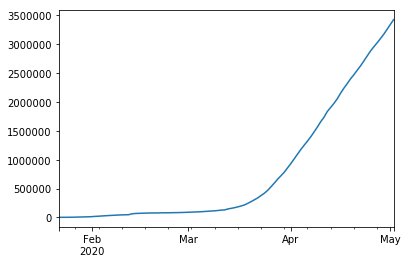

In [8]:
cumul_data.plot()

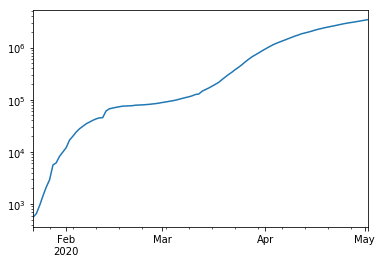

In [9]:
cumul_data.plot(logy=True)

Si l'on devait faire une petite analyse de ces graphes, on voit que le nombre de contaminations va fortement à la hausse sur le temps ... néanmoins, la courbe n'est pas exponentielle mais droite. Les mesures de confinement qui ont commencées en moyene dans le mois de Mars sont efficaces pour empêcher la propagation exponentielle du virus.